In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# Load MNIST dataset
(x_train, y_train),(x_test,y_test)=datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step


In [ ]:
## Normalize data (scale pixel values 0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to (28,28,1) because CNN expects 3D input (H,W,Channels)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

In [5]:
# Normalize data (scale pixel value 0-255-> 0-1)
x_train,x_test=x_train/255.0, x_test / 255.0

In [7]:
# reshape to (28,28,1) because CNN expects 3D input (H, W, Channeld)
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test= x_test.reshape((x_test.shape[0],28,28,1))

In [9]:
print("Training data shape:",x_train.shape)
print("Testing data shape:",x_test.shape)

Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


# CNN Model

In [13]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

# Compile & Train

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history= model.fit(x_train, y_train, epochs=5,
                   validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 15ms/step - accuracy: 0.8937 - loss: 0.3369 - val_accuracy: 0.9857 - val_loss: 0.0423
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9847 - loss: 0.0485 - val_accuracy: 0.9864 - val_loss: 0.0443
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9900 - loss: 0.0319 - val_accuracy: 0.9898 - val_loss: 0.0317
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9932 - loss: 0.0231 - val_accuracy: 0.9887 - val_loss: 0.0371
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - accuracy: 0.9947 - loss: 0.0165 - val_accuracy: 0.9893 - val_loss: 0.0321


In [23]:
# Evaluate Model

In [20]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print("\nTest Accuracy:", test_acc)

313/313 - 2s - 6ms/step - accuracy: 0.9893 - loss: 0.0321

Test Accuracy: 0.989300012588501


# plot accuracy and loss

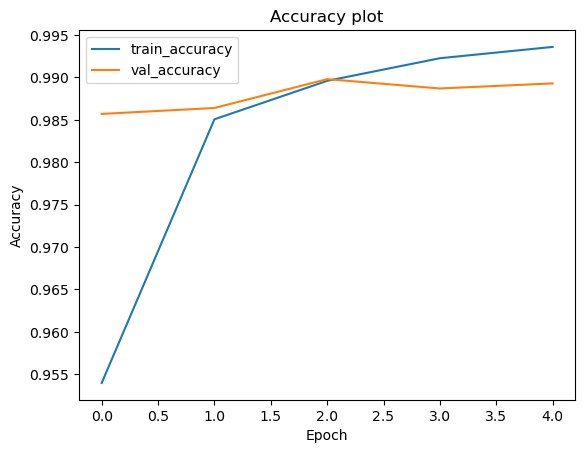

In [30]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title("Accuracy plot")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

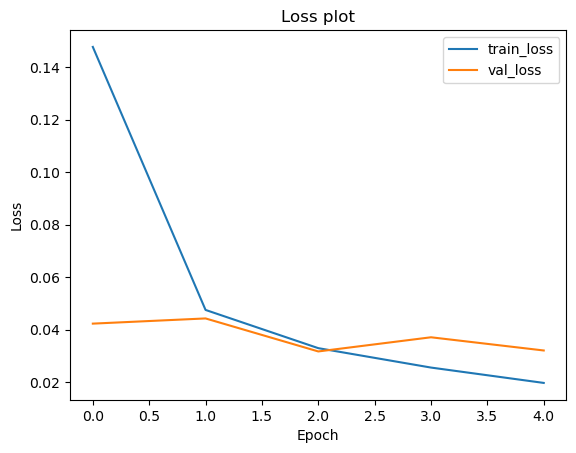

In [32]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.title("Loss plot")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Make Prediction

In [36]:
import numpy as np

predictions= model.predict(x_test)
print("predicted digit:", np.argmax(predictions[0]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
predicted digit: 7


# Results

The Convolutional Neural Network (CNN) was trained on the MNIST dataset consisting of 60,000 training images and 10,000 test images of handwritten digits (0–9). After 5 training epochs, the model achieved:

Test Accuracy: 98.93%

Test Loss: 0.0321

This shows that the model was able to correctly classify almost all handwritten digit images with very high accuracy.